## ¿Existe relación alguna entre el total de minutos usados con la compañía y el ingreso total de los clientes?
En el desarrollo de este caso introduciremos las librerías pandas, numpy y matplotlib para el preprocesamiento, visualización de un conjunto de datos y el desarrollo de algunas medidas estadísticas descriptivas.



##  Introducción 

La revisión del comportamiento de los clientes en cualquier empresa es de vital importancia para el desarrollo de estrategias  tanto de mejoramiento de productos como de publicidad y toma de decisiones. Evaluaremos la información obtenida de un conjunto de registro obtenidos de una empresa de telecomunicaciones que cuenta con la revisión de las siguientes variables:

1. totrev: Ingresos del cliente
2. totmou: Total de minutos usados por el cliente
3. area: Área geográfica
4. creditcd: Indicador de tarjeta de crédito
5. eqpdays: Número de días (antigüedad) del equipo actual

Es importante mencionar que la empresa contiene una gran cantidad de clientes y hacer el análisis uno a uno no es lo  óptimo. Con ayuda de la programación y el análisis de datos, se logrará llegar a conclusiones rápidas y acertadas para encontrar relaciones que a simple vista no son tenidas en cuenta.

### ¿Qué se quiere identificar? 

Teniendo en cuenta la información de la base de datos se quiere identificar si hay una relación entre el total de minutos usados por el cliente con la compañía y el ingreso total de los clientes, es decir, Será posible afirmar que cuando una persona
tiene un mayor ingreso mayor entonces es mayor la utilización de minutos o todo lo contrario?


####  Insumos para tratar este problema


Teniendo en cuenta que la compañía tenia estándares para la entrega de la información, se dispone de un  conjunto de tablas en formato CSV ordenado de la siguiente manera:
La información de este conjunto de datos puede encontrase en [aquí](https://www.kaggle.com/abhinav89/telecom-customer?select=Telecom_customer+churn.csv)

### Objetivos

En este caso usted tendrá que cargar varias bases de datos, hará una exploración básica sobre la información y fusionará las distintas bases para tener una visión general del problema. La idea es que desarrolle las siguientes habilidades:

1. Manejo de la librería pandas de Python para cargar y leer datos; 
2. Ideas elementales para una útil transformación de los datos;
3. Construcción y presentación de argumentos válidos que le brindarán una solución para la pregunta expresada más arriba y llegar a una conclusión. 
4. Visualización de gráficas elementales que le permitirá entender mejor la información contenida en los datos.

#### Importación de paquetes


Una de las mejores opciones para trabajar con datos tabulares en Python es usar el módulo pandas. La librería `pandas` provee estructuras de datos, genera gráficos de alta calidad con `matplotlib` y se integra de buena forma con otras librerías que usan arrays de `numpy`.

Debemos revisar si la librería se encuentra en nuestro sistema usando el comando 

```python
!pip show librería
```


In [1]:
!pip show pandas
#!pip show numpy
#!pip show matplotlib

Name: pandas
Version: 1.3.4
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: The Pandas Development Team
Author-email: pandas-dev@python.org
License: BSD-3-Clause
Location: c:\users\cizai\anaconda3\lib\site-packages
Requires: numpy, python-dateutil, pytz
Required-by: statsmodels, seaborn, dataprep


En el caso de que la librería no se encuentre instalada ejecutamos el comando

```python
!pip install librería
```

Para importar las librerías usamos el comando 
```python
import librería as alias
```

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

Luego de que tener los paquetes activados dentro de nuestro ambiente de python podremos usar las fucnciones que se encuentren en la librería.

### Introducción a pandas

Poner información sobre pandas e indicar la diferencia entre series y dataframe

![](https://www.cdn.geeksforgeeks.org/wp-content/uploads/creating_dataframe1.png)

A continuación, mostramos el código a ejecutar para crear una ` Serie`

In [25]:
Serie1 = pd.Series(index=['Primero', 'Segundo', 'Tercero', 'Cuarto', 'Quinto'],
 name="Variable1", data=["A","B","C","D","E"]
)
Serie1

Primero    A
Segundo    B
Tercero    C
Cuarto     D
Quinto     E
Name: Variable1, dtype: object

In [7]:
Data_Frame = pd.DataFrame( 
index=['Primero', 'Segundo', 'Tercero', 'Cuarto', 'Quinto'],
    columns=["Variable2","Variable3"], 
    data=[['Hola', 12], ['Mi', 22],['Nombre',32.0],['es',42],['frailejon',52]]
)
Data_Frame

,Variable2,Variable3
Primero,Hola,12.0
Segundo,Mi,22.0
Tercero,Nombre,32.0
Cuarto,es,42.0
Quinto,frailejon,52.0


Para revisar el tipo de objeto que contiene nuestro DataFrame podemos ejecutar

In [8]:
Data_Frame.dtypes
#Serie1.dtypes

Variable2     object
Variable3    float64
dtype: object

Extraer datos sobre la base:

Si quiero conocer una columna de la base simplemente escribo `DataFrame['nombre_columna']`

In [9]:
Data_Frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, Primero to Quinto
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Variable2  5 non-null      object 
 1   Variable3  5 non-null      float64
dtypes: float64(1), object(1)
memory usage: 120.0+ bytes


In [21]:
DF_filtrado=Data_Frame[Data_Frame['Variable2']=='Hola'][['Variable3']]

In [22]:
DF_filtrado

,Variable3
Primero,12.0


In [28]:
Data_Frame['Variable1']=[1,2,3,4,5]

In [29]:
Data_Frame

,Variable2,Variable3,Variable1
Primero,Hola,12.0,1
Segundo,Mi,22.0,2
Tercero,Nombre,32.0,3
Cuarto,es,42.0,4
Quinto,frailejon,52.0,5


Si quiero ver varias columnas de la base de datos, utilizo doble paréntesis cuadrado:

`DataFrame[['columna1','columna2']]`

In [33]:
Data_Frame[['Variable1','Variable2','Variable1']]

,Variable1,Variable2,Variable1
Primero,1,Hola,1
Segundo,2,Mi,2
Tercero,3,Nombre,3
Cuarto,4,es,4
Quinto,5,frailejon,5


Si quiero ver datos por registros utilizo loc:

In [34]:
Data_Frame.iloc[[0,2,4]]

,Variable2,Variable3,Variable1
Primero,Hola,12.0,1
Tercero,Nombre,32.0,3
Quinto,frailejon,52.0,5


In [36]:
Data_Frame[Data_Frame['Variable2']=='frailejon']

,Variable2,Variable3,Variable1
Quinto,frailejon,52.0,5


In [37]:
Data_Frame['Variable2']['Quinto']='Frailejon'

C:\Users\cizai\AppData\Local\Temp/ipykernel_27892/1379033139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_Frame['Variable2']['Quinto']='Frailejon'


In [38]:
Data_Frame

,Variable2,Variable3,Variable1
Primero,Hola,12.0,1
Segundo,Mi,22.0,2
Tercero,Nombre,32.0,3
Cuarto,es,42.0,4
Quinto,Frailejon,52.0,5


In [41]:
Data_Frame['Variable3'][Data_Frame[Data_Frame['Variable2']=='Frailejon'].index]=102

C:\Users\cizai\AppData\Local\Temp/ipykernel_27892/2920409230.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_Frame['Variable3'][Data_Frame[Data_Frame['Variable2']=='Frailejon'].index]=102
C:\Users\cizai\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [44]:
print("Hola 'señor'")

Hola 'señor'


In [46]:
Data_Frame['Ventas hoy']=[2,3,5,6,7]

In [49]:
Data_Frame['Variable3']=Data_Frame['Variable3']+Data_Frame['Ventas hoy']

In [52]:
Data_Frame['Ventas hoy']=0

In [53]:
Data_Frame

,Variable2,Variable3,Variable1,Ventas hoy
Primero,Hola,14.0,1,0
Segundo,Mi,25.0,2,0
Tercero,Nombre,37.0,3,0
Cuarto,es,48.0,4,0
Quinto,Frailejon,109.0,5,0


In [45]:

for i in Data_Frame.index:
    print(Data_Frame.loc[i])

Variable2    Hola
Variable3    12.0
Variable1       1
Name: Primero, dtype: object
Variable2      Mi
Variable3    22.0
Variable1       2
Name: Segundo, dtype: object
Variable2    Nombre
Variable3      32.0
Variable1         3
Name: Tercero, dtype: object
Variable2      es
Variable3    42.0
Variable1       4
Name: Cuarto, dtype: object
Variable2    Frailejon
Variable3        102.0
Variable1            5
Name: Quinto, dtype: object


In [63]:
Data_Frame['Variable4']=['A','A','B','B','A']
Data_Frame['Variable3']=[12.0,22,32,42,52]

In [77]:
Data_Frame['VariableAux']=2*Data_Frame[Data_Frame['Variable4']=='A']['Variable3']
Data_Frame['VariableAux2']=Data_Frame[Data_Frame['Variable4']=='B']['Variable3']/2
Data_Frame['VariableAux']=Data_Frame['VariableAux'].fillna(0)
Data_Frame['VariableAux2']=Data_Frame['VariableAux2'].fillna(0)

In [78]:
Data_Frame['Variable3']=Data_Frame['VariableAux']+Data_Frame['VariableAux2']

In [79]:
Data_Frame

,Variable2,Variable3,Variable1,Ventas hoy,Variable4,VariableAux,VariableAux2
Primero,Hola,48.0,1,0,A,48.0,0.0
Segundo,Mi,88.0,2,0,A,88.0,0.0
Tercero,Nombre,8.0,3,0,B,0.0,8.0
Cuarto,es,10.5,4,0,B,0.0,10.5
Quinto,Frailejon,208.0,5,0,A,208.0,0.0


### Carga de información en `pandas`

Para nuestro  ejercicio usaremos los siguientes conjuntos de datos:

1. NEW ENGLAND AREA.csv
2. ATLANTIC SOUTH AREA.csv
3. NEW YORK CITY AREA.csv
4. CHICAGO AREA.csv
5. NORTH FLORIDA AREA.csv
6. DC-MARYLAND-VIRGINIA AREA.csv
7. GREAT LAKES AREA.csv
8. NORTHWEST-ROCKY MOUNTAIN AREA.csv
9. MIDWEST AREA.csv
10. SOUTHWEST AREA.csv
11. LOS ANGELES AREA.csv
12. HOUSTON AREA.csv
13. CALIFORNIA NORTH AREA.csv
14. CENTRAL-SOUTH TEXAS AREA.csv
15. DALLAS AREA.csv
16. PHILADELPHIA AREA.csv
17. TENNESSEE AREA.csv
18. OHIO AREA.csv
19. SOUTH FLORIDA AREA.csv

Cada uno de estos conjuntos de datos contiene la información de:

1. *mou_Mean:* Número medio de minutos de uso mensuales
2. *custcare_Mean:* Número medio de llamadas de atención al cliente
3. *area:*  Área geografica
4. *creditcd:* Indicador de tarjeta de crédito
5. *eqpdays:* Número de días (antigüedad) del equipo actual

Además, se incluye _Credito_dias.csv_ con la información de 2 variables adicionales para los registros las cuales son:

1. _creditcd:_ Indicador de tarjeta de crédito
2. _eqpdays:_ Número de días (antigüedad) del equipo actual

Revisaremos inicialmente los datos contenidos en _Credito_dias.csv_ para revisar algunas funciones interesantes de `pandas`, usaremos el comando 
```python
pd.read_csv("archivo.csv")
```
Podemos definir el número de registros a imprimir usando
```python
pd.options.display.min_rows=10
````

In [1]:
import os

os.getcwd()

'C:\\Users\\cizai\\Dropbox\\Docente\\Externado\\Github Projects\\Seminario de Programación\\seminario-de-programacion\\Cuadernos\\Clase 2'

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'Base Grande.csv',
 'Bases',
 'Bases_peque',
 'Base_peque.ipynb',
 'Relación entre minutos usados e ingreso de clientes - Introducción a Pandas.ipynb']

In [3]:
os.listdir('Bases')

['.ipynb_checkpoints',
 'ATLANTIC SOUTH AREA.csv',
 'CALIFORNIA NORTH AREA.csv',
 'CENTRAL-SOUTH TEXAS AREA.csv',
 'CHICAGO AREA.csv',
 'Credito_dias.csv',
 'DALLAS AREA.csv',
 'DC-MARYLAND-VIRGINIA AREA.csv',
 'GREAT LAKES AREA.csv',
 'HOUSTON AREA.csv',
 'LOS ANGELES AREA.csv',
 'MIDWEST AREA.csv',
 'NEW ENGLAND AREA.csv',
 'NEW YORK CITY AREA.csv',
 'NORTH FLORIDA AREA.csv',
 'NORTHWEST-ROCKY MOUNTAIN AREA.csv',
 'OHIO AREA.csv',
 'PHILADELPHIA AREA.csv',
 'SOUTH FLORIDA AREA.csv',
 'SOUTHWEST AREA.csv',
 'TENNESSEE AREA.csv',
 'Untitled.ipynb']

In [4]:
os.listdir('../images')

['.ipynb_checkpoints', 'banner.jpg', 'bootstrapping.jpg', 'ciclo.jpg']

In [5]:
path='../../img/'

os.listdir(path)

['.ipynb_checkpoints', 'carta.jpg', 'cuad1.png', 'cuad2.png', 'DF.csv']

In [6]:
Data_Frame.to_csv(path+'DF.csv')

NameError: name 'Data_Frame' is not defined

In [9]:
import pandas as pd
df=pd.read_csv("Bases/Credito_dias.csv", sep=",",index_col="Customer_ID")
df

,totmou,totrev,creditcd,eqpdays
Customer_ID,,,,
1082423,7269.0,906.58,Y,371
1069232,13552.0,1172.25,N,83
1031705,4152.0,577.39,Y,675
1089806,1863.0,294.26,Y,218
1076695,4155.0,433.16,N,222
...,...,...,...,...
1027614,2570.0,484.31,Y,611
1098422,2105.0,583.36,Y,1243
1096497,3690.0,294.29,Y,212


El conjunto de datos se encuentra en el `DataFrame` `df`

sobre el objeto creado podemos usar  algunas funciones  para darnos una idea del comportamiento de la información:
```python
df.head(n)  # imprime los primeros n registros del DataFrame
df.tail(n)  # imprime los últimos n registros del DataFrame 
df.shape    # imprime el numero de columnas y filas del DataFrame
df.columns  # imprime el nombre de las columnas del DataFrame
df.index    # imprime el indice de los registros del DataFrame
df.dtypes   # imprime el tipo de cada una de las columnnas del DataFrame
df.sample(n)# imprime una muestra aleatoria de n registros en el DataFrame
```

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1082423 to 1099003
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   totmou    10000 non-null  float64
 1   totrev    10000 non-null  float64
 2   creditcd  9848 non-null   object 
 3   eqpdays   10000 non-null  int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 390.6+ KB


In [11]:
df['totmou']

Customer_ID
1082423     7269.0
1069232    13552.0
1031705     4152.0
1089806     1863.0
1076695     4155.0
            ...   
1027614     2570.0
1098422     2105.0
1096497     3690.0
1087248     3333.0
1099003     5025.0
Name: totmou, Length: 10000, dtype: float64

In [12]:
df['totmou'].mean()

7692.804865672701

In [13]:
df.describe(include='all')

,totmou,totrev,creditcd,eqpdays
count,10000.000000,10000.000000,9848,10000.000000
unique,NaN,NaN,2,NaN
top,NaN,NaN,Y,NaN
freq,NaN,NaN,6796,NaN
mean,7692.804866,1042.133807,NaN,386.794500
std,8657.917883,857.144895,NaN,252.720196
min,0.000000,11.100000,NaN,-5.000000
25%,2576.000000,526.787500,NaN,210.000000
50%,5262.000000,820.235000,NaN,338.000000
75%,9823.250000,1272.975000,NaN,522.000000


In [14]:
display("primeros 3 registros",df.head(3))
display("3 últimos registros",df.tail(3))
display("Columnas:",df.columns)
display("Índices:",df.index)
display("Tipos de registros en el DataFrame",df.dtypes)
display("Muestra aleatoria de 3 registros",df.sample(3))
display("dimensión",df.shape)

'primeros 3 registros'

,totmou,totrev,creditcd,eqpdays
Customer_ID,,,,
1082423,7269.0,906.58,Y,371
1069232,13552.0,1172.25,N,83
1031705,4152.0,577.39,Y,675


'3 últimos registros'

,totmou,totrev,creditcd,eqpdays
Customer_ID,,,,
1096497,3690.0,294.29,Y,212
1087248,3333.0,233.08,Y,290
1099003,5025.0,1436.49,Y,1029


'Columnas:'

Index(['totmou', 'totrev', 'creditcd', 'eqpdays'], dtype='object')

'Índices:'

Int64Index([1082423, 1069232, 1031705, 1089806, 1076695, 1091652, 1043846,
            1088967, 1045239, 1046584,
            ...
            1087145, 1002540, 1044082, 1083458, 1093976, 1027614, 1098422,
            1096497, 1087248, 1099003],
           dtype='int64', name='Customer_ID', length=10000)

'Tipos de registros en el DataFrame'

totmou      float64
totrev      float64
creditcd     object
eqpdays       int64
dtype: object

'Muestra aleatoria de 3 registros'

,totmou,totrev,creditcd,eqpdays
Customer_ID,,,,
1035723,28788.0,3383.14,Y,702
1011894,12968.0,1741.80,Y,351
1008918,4464.0,727.06,Y,649


'dimensión'

(10000, 4)

In [15]:
df.creditcd

Customer_ID
1082423    Y
1069232    N
1031705    Y
1089806    Y
1076695    N
          ..
1027614    Y
1098422    Y
1096497    Y
1087248    Y
1099003    Y
Name: creditcd, Length: 10000, dtype: object

In [16]:
df[df.creditcd.duplicated()]

,totmou,totrev,creditcd,eqpdays
Customer_ID,,,,
1031705,4152.0,577.39,Y,675
1089806,1863.0,294.26,Y,218
1076695,4155.0,433.16,N,222
1091652,5441.0,578.80,Y,68
1043846,7294.0,1495.18,Y,460
...,...,...,...,...
1027614,2570.0,484.31,Y,611
1098422,2105.0,583.36,Y,1243
1096497,3690.0,294.29,Y,212


Este conjunto de datos corresponde a 10000 registros y 2 variables

### Manejo de datos duplicados 

os dataframes tienen la posibilidad de detectar las filas duplicadas con la función: 
```
df.duplicated({columns})
```
Si no especifica {columns}, se busacarán duplicados teniendo en cuenta todas las columnas. Una vez detectados el dtaframe tiene un función para eliminar filas duplicadas, haciendo:

```
df = df.drop_duplicates()
```
También es posible eliminar filas que duplican solo algunos campos. Con el fin de dejar solo una ocurrencia.

```
df.drop_duplicates(['nombre', 'apellido', 'cédula'], keep='last')
```
En este caso, como no todas las colomnas son iguales se conserva solo la última ocurrencia.

### Manejo de datos perdidos o esperados
Son aquellos datos flatantes en la tabla que por alguna razón o error no se encuentran, o parecen con algún valor o etiqueta de no válido. 
Para manipular datos perdidos use la explicación dada el siguiente enlace: [DATOS PERDIDOS](http://ligdigonzalez.com/manipulando-datos-perdidos-en-python/)
recuerde que para reemplazar datos perdidos en un dataframe $df$ se usa la función:
```python
promedio = df['totrev'].mean()
df['nota'].replace(np.nan, promedio)
```
en donde la opción 'promedio' busca el valor promedio de la columna (datos numéricos) o la moda (datos categóricos) para reemplazar el valor no válido.


In [24]:
df.isnull().any(axis=0)

totmou      False
totrev      False
creditcd     True
eqpdays     False
dtype: bool

In [37]:
perd=df.isnull().any(axis=1)
perd

Customer_ID
1082423    False
1069232    False
1031705    False
1089806    False
1076695    False
           ...  
1027614    False
1098422    False
1096497    False
1087248    False
1099003    False
Length: 10000, dtype: bool

In [38]:
range(len(df))

range(0, 10000)

In [39]:
df.index

Int64Index([1082423, 1069232, 1031705, 1089806, 1076695, 1091652, 1043846,
            1088967, 1045239, 1046584,
            ...
            1087145, 1002540, 1044082, 1083458, 1093976, 1027614, 1098422,
            1096497, 1087248, 1099003],
           dtype='int64', name='Customer_ID', length=10000)

In [40]:
for i in df.index[:10]:
    print(i)

1082423
1069232
1031705
1089806
1076695
1091652
1043846
1088967
1045239
1046584


In [41]:
df[perd]

,totmou,totrev,creditcd,eqpdays
Customer_ID,,,,
1072218,5684.0,857.65,NaN,244
1066597,925.0,373.12,NaN,344
1023352,14466.0,2243.76,NaN,387
1045521,2504.0,756.79,NaN,495
1001813,76260.0,5526.11,NaN,361
...,...,...,...,...
1050795,15591.0,1330.71,NaN,447
1096985,3011.0,522.14,NaN,74
1025203,853.0,650.34,NaN,780


In [42]:
perdidos = df[df.isnull().any(axis=1)]
perdidos

,totmou,totrev,creditcd,eqpdays
Customer_ID,,,,
1072218,5684.0,857.65,NaN,244
1066597,925.0,373.12,NaN,344
1023352,14466.0,2243.76,NaN,387
1045521,2504.0,756.79,NaN,495
1001813,76260.0,5526.11,NaN,361
...,...,...,...,...
1050795,15591.0,1330.71,NaN,447
1096985,3011.0,522.14,NaN,74
1025203,853.0,650.34,NaN,780


In [103]:
df['creditcd'].value_counts(dropna=False)

Y      6796
N      3052
NaN     152
Name: creditcd, dtype: int64

In [104]:
promedio = df['totrev'].mean()
df['totrev']=df['totrev'].replace(np.nan, promedio)

También es recomendado usar la funcion `fillna()`

In [106]:
df['creditcd'].fillna("Y",inplace=True)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1082423 to 1099003
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   totmou    10000 non-null  float64
 1   totrev    10000 non-null  float64
 2   creditcd  10000 non-null  object 
 3   eqpdays   10000 non-null  int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 390.6+ KB


In [52]:
df.isnull().any(axis=0)

totmou      False
totrev      False
creditcd    False
eqpdays     False
dtype: bool

In [53]:
df

,totmou,totrev,creditcd,eqpdays
Customer_ID,,,,
1082423,7269.0,906.58,Y,371
1069232,13552.0,1172.25,N,83
1031705,4152.0,577.39,Y,675
1089806,1863.0,294.26,Y,218
1076695,4155.0,433.16,N,222
...,...,...,...,...
1027614,2570.0,484.31,Y,611
1098422,2105.0,583.36,Y,1243
1096497,3690.0,294.29,Y,212


In [27]:
df['creditcd'].value_counts(dropna=False)

Y      6796
N      3052
NaN     152
Name: creditcd, dtype: int64



### Cálculo de estadísticas resumen

Las medidas estadísticas resumen son de gran ayuda para comprender como es el comportamiento de la distribución de los datos, los objetos `DataFrame` ofrecen facilidades para hacer el cálculo de algunas estadísticas sobre cada una de las variables.

```python
df["var"].value_counts() # Encuentra la frecuencia de las categorias de una columna (la columna debe ser cualitativa)
df["var"].min()          # Encuentra el mínimo de una variable cuantitativa
df["var"].median()       # Encuentra el mínimo de una variable cuantitativa
df["var"].mean()         # Encuentra el promedio de una variable cuantitativa
df["var"].max()          # Encuentra el máximo de una variable cuantitativa
df["var"].quantile()     # Encuentra los cuantiles de una variable cuantitativa
```


In [54]:
df["creditcd"].value_counts()

Y    6948
N    3052
Name: creditcd, dtype: int64

In [55]:
df["creditcd"].count()

10000

In [56]:
df["eqpdays"].min()

-5

In [57]:
df["eqpdays"]=[0 if i<0 else i for i in df["eqpdays"] ]

In [58]:
df["eqpdays"].min()

0

La exploración del anterior resultado puede mostrar inconsistencias  en los registros y nos ayudará a tomar decisiones sobre algunos registros, el valor mínimo de la variable `eqpdays` (Número de días (antigüedad) del equipo actual) debería ser estrictamente positivo y estos pueden ser errores de ingreso.

In [59]:
df["eqpdays"].max()

1823

In [60]:
df["eqpdays"].median()

338.0

In [61]:
df["eqpdays"].mean()

386.7992

In [62]:
df["eqpdays"].quantile(0.25)

210.0

In [63]:
df["eqpdays"].quantile(0.75)

522.0

Estas estadísticas pueden ser resumidas con el comando:
```python
df["var"].describe()  # Estadísticas resumen principales
```

In [64]:
df["eqpdays"].describe()

count    10000.00000
mean       386.79920
std        252.71297
min          0.00000
25%        210.00000
50%        338.00000
75%        522.00000
max       1823.00000
Name: eqpdays, dtype: float64

In [65]:
df['creditcd'].describe()

count     10000
unique        2
top           Y
freq       6948
Name: creditcd, dtype: object

In [66]:
df.describe()

,totmou,totrev,eqpdays
count,10000.000000,10000.000000,10000.00000
mean,7692.804866,1042.133807,386.79920
std,8657.917883,857.144895,252.71297
min,0.000000,11.100000,0.00000
25%,2576.000000,526.787500,210.00000
50%,5262.000000,820.235000,338.00000
75%,9823.250000,1272.975000,522.00000
max,163264.176700,13426.600000,1823.00000


In [67]:
df.describe(include='all')

,totmou,totrev,creditcd,eqpdays
count,10000.000000,10000.000000,10000,10000.00000
unique,NaN,NaN,2,NaN
top,NaN,NaN,Y,NaN
freq,NaN,NaN,6948,NaN
mean,7692.804866,1042.133807,NaN,386.79920
std,8657.917883,857.144895,NaN,252.71297
min,0.000000,11.100000,NaN,0.00000
25%,2576.000000,526.787500,NaN,210.00000
50%,5262.000000,820.235000,NaN,338.00000
75%,9823.250000,1272.975000,NaN,522.00000


### Agregar información de múltiples tablas

Hemos desarrollado un breve resumen estadístico solamente usando la base `Credito_dias.csv`. Realizaremos la combinación de las 19 áreas que nos reportan en los archivos csv. Una forma de lograr esta tarea de agregación es usar el método pd.concat() de pandas. Una entrada en este método puede ser una lista de DataFrames que quiera concatenar. Usaremos un ciclo  `for` sobre cada uno de los archivos de áreas para 


In [68]:
df.columns
df.dtypes

totmou      float64
totrev      float64
creditcd     object
eqpdays       int64
dtype: object

### Ejercicio 1
Determinar los percentiles 25, 50 y 75 para las columnas ttomou, totrev, eqpdays

In [69]:
#Espacio para el desarrollo del ejercicio
df["totmou"].describe()

count     10000.000000
mean       7692.804866
std        8657.917883
min           0.000000
25%        2576.000000
50%        5262.000000
75%        9823.250000
max      163264.176700
Name: totmou, dtype: float64

In [70]:
df["totrev"].describe()

count    10000.000000
mean      1042.133807
std        857.144895
min         11.100000
25%        526.787500
50%        820.235000
75%       1272.975000
max      13426.600000
Name: totrev, dtype: float64

In [71]:
df.describe(include='all')

,totmou,totrev,creditcd,eqpdays
count,10000.000000,10000.000000,10000,10000.00000
unique,NaN,NaN,2,NaN
top,NaN,NaN,Y,NaN
freq,NaN,NaN,6948,NaN
mean,7692.804866,1042.133807,NaN,386.79920
std,8657.917883,857.144895,NaN,252.71297
min,0.000000,11.100000,NaN,0.00000
25%,2576.000000,526.787500,NaN,210.00000
50%,5262.000000,820.235000,NaN,338.00000
75%,9823.250000,1272.975000,NaN,522.00000


In [109]:
areas=list(os.listdir("Bases"))
areas.remove('.ipynb_checkpoints')
areas.remove('Credito_dias.csv')
areas

['ATLANTIC SOUTH AREA.csv',
 'CALIFORNIA NORTH AREA.csv',
 'CENTRAL-SOUTH TEXAS AREA.csv',
 'CHICAGO AREA.csv',
 'DALLAS AREA.csv',
 'DC-MARYLAND-VIRGINIA AREA.csv',
 'GREAT LAKES AREA.csv',
 'HOUSTON AREA.csv',
 'LOS ANGELES AREA.csv',
 'MIDWEST AREA.csv',
 'NEW ENGLAND AREA.csv',
 'NEW YORK CITY AREA.csv',
 'NORTH FLORIDA AREA.csv',
 'NORTHWEST-ROCKY MOUNTAIN AREA.csv',
 'OHIO AREA.csv',
 'PHILADELPHIA AREA.csv',
 'SOUTH FLORIDA AREA.csv',
 'SOUTHWEST AREA.csv',
 'TENNESSEE AREA.csv',
 'Untitled.ipynb']

In [110]:
areas=list(os.listdir("Bases"))
areas=[i for i in areas if i.count('.csv')>=1 ]
areas

['ATLANTIC SOUTH AREA.csv',
 'CALIFORNIA NORTH AREA.csv',
 'CENTRAL-SOUTH TEXAS AREA.csv',
 'CHICAGO AREA.csv',
 'Credito_dias.csv',
 'DALLAS AREA.csv',
 'DC-MARYLAND-VIRGINIA AREA.csv',
 'GREAT LAKES AREA.csv',
 'HOUSTON AREA.csv',
 'LOS ANGELES AREA.csv',
 'MIDWEST AREA.csv',
 'NEW ENGLAND AREA.csv',
 'NEW YORK CITY AREA.csv',
 'NORTH FLORIDA AREA.csv',
 'NORTHWEST-ROCKY MOUNTAIN AREA.csv',
 'OHIO AREA.csv',
 'PHILADELPHIA AREA.csv',
 'SOUTH FLORIDA AREA.csv',
 'SOUTHWEST AREA.csv',
 'TENNESSEE AREA.csv']

In [111]:
import re
text='hOla'
z=re.search("[A-Z]",text)
z.pos

0

In [28]:
import glob
areas=glob.glob("Bases/*AREA*.csv")
areas

['Bases\\ATLANTIC SOUTH AREA.csv',
 'Bases\\CALIFORNIA NORTH AREA.csv',
 'Bases\\CENTRAL-SOUTH TEXAS AREA.csv',
 'Bases\\CHICAGO AREA.csv',
 'Bases\\DALLAS AREA.csv',
 'Bases\\DC-MARYLAND-VIRGINIA AREA.csv',
 'Bases\\GREAT LAKES AREA.csv',
 'Bases\\HOUSTON AREA.csv',
 'Bases\\LOS ANGELES AREA.csv',
 'Bases\\MIDWEST AREA.csv',
 'Bases\\NEW ENGLAND AREA.csv',
 'Bases\\NEW YORK CITY AREA.csv',
 'Bases\\NORTH FLORIDA AREA.csv',
 'Bases\\NORTHWEST-ROCKY MOUNTAIN AREA.csv',
 'Bases\\OHIO AREA.csv',
 'Bases\\PHILADELPHIA AREA.csv',
 'Bases\\SOUTH FLORIDA AREA.csv',
 'Bases\\SOUTHWEST AREA.csv',
 'Bases\\TENNESSEE AREA.csv']

In [29]:
print("Definición de los símbolos de las acciones")

lista_de_df = []
# Bucle sobre los símbolos
#print(" --- Inicie el bucle sobre los símbolos --- ")
for i in areas:
    #print("Procesando el símbolo: " + i)
    temp_df = pd.read_csv(i,index_col="Customer_ID")
    temp_df["area"] = i
    lista_de_df.append(temp_df)
    # Usando un salto de línea al final de esta cadena de caracteres por estética
   # print(" --- Bucle completo sobre los símbolos --- \n")
    # Combinando en un solo DataFrame usando el concat
print("Agregando los datos")
agr_df = pd.concat(lista_de_df, axis=0)
print(agr_df.shape)
print("Cabeza del DataFrame agr_df: ")
agr_df.head()

Definición de los símbolos de las acciones
Agregando los datos
(9997, 4)
Cabeza del DataFrame agr_df: 


,custcare_Mean,new_cell,area,creditcd
Customer_ID,,,,
1069232,3.666667,U,Bases\ATLANTIC SOUTH AREA.csv,N
1043846,0.000000,U,Bases\ATLANTIC SOUTH AREA.csv,Y
1008539,0.000000,N,Bases\ATLANTIC SOUTH AREA.csv,Y
1068315,0.000000,U,Bases\ATLANTIC SOUTH AREA.csv,N
1074220,1.666667,U,Bases\ATLANTIC SOUTH AREA.csv,N


In [41]:
print(r"Bases\\")

Bases\\


In [45]:
texto=r"Bases\\"
agr_df['area']=agr_df['area'].str.replace(texto , '').str.replace(" AREA.csv","")

C:\Users\cizai\AppData\Local\Temp/ipykernel_6412/2741675326.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  agr_df['area']=agr_df['area'].str.replace(texto , '').str.replace(" AREA.csv","")


In [47]:
agr_df

,custcare_Mean,new_cell,area,creditcd
Customer_ID,,,,
1069232,3.666667,U,ATLANTIC SOUTH,N
1043846,0.000000,U,ATLANTIC SOUTH,Y
1008539,0.000000,N,ATLANTIC SOUTH,Y
1068315,0.000000,U,ATLANTIC SOUTH,N
1074220,1.666667,U,ATLANTIC SOUTH,N
...,...,...,...,...
1093180,3.000000,U,TENNESSEE,Y
1018795,0.000000,U,TENNESSEE,Y
1055110,9.666667,U,TENNESSEE,N


In [48]:
agr_df.sort_index(axis=0,inplace=True)
agr_df.to_csv('Base Grande.csv')

In [49]:
df

,totmou,totrev,creditcd,eqpdays
Customer_ID,,,,
1082423,7269.0,906.58,Y,371
1069232,13552.0,1172.25,N,83
1031705,4152.0,577.39,Y,675
1089806,1863.0,294.26,Y,218
1076695,4155.0,433.16,N,222
...,...,...,...,...
1027614,2570.0,484.31,Y,611
1098422,2105.0,583.36,Y,1243
1096497,3690.0,294.29,Y,212


In [50]:
agr_df

,custcare_Mean,new_cell,area,creditcd
Customer_ID,,,,
1000014,0.000000,Y,CENTRAL-SOUTH TEXAS,N
1000016,1.000000,N,DALLAS,Y
1000021,0.333333,U,TENNESSEE,Y
1000023,0.000000,N,NORTHWEST-ROCKY MOUNTAIN,N
1000029,0.000000,N,NEW ENGLAND,Y
...,...,...,...,...
1099907,17.333333,U,LOS ANGELES,Y
1099932,0.000000,U,LOS ANGELES,Y
1099963,0.000000,U,SOUTHWEST,Y


La ejecución nos da como resultado una base de datos de 9997 registros correspondiente a la concatenación de todas las áreas. Se debe notar que nuestro conjunto de datos también es indexado por la columna `Customer_ID` y que la dimensión de los registros de está nueva base es menor a la de  `Creditos_dias.csv`.

 ## Cruce de información

El cruce de información es una operación esencial en el análisis de los datos. Usualmente, la posibilidad de realizar el cruce de dos o más fuentes de información es el primer paso para responder preguntas complejas acerca de los datos. Existen muchas formas de cruzar o combinar tablas de datos. El cruce de estos datos siempre tiene un propósito. Por tanto, se debe realizar un análisis de lo que se requiere antes de iniciar. Para esto, lo primero es conocer bien las fuentes de información que se van a relacionar. 

### Uniones (Joins)
Usando la librería pandas se pueden realizar 4 tipos de uniones para cruzar información entre dos fuentes de datos, ver Figura abajo. 
* INNER JOIN: este tipo de cruce incluye solo los resgistros que coincieden en las dos tablas
* LEFT JOIN:  en este tipo de cruce se incluyen todos los registros de la primera tabla aunque no aparezcan coincidencias en la segunda. Cuando no hay coincidencias en la segunda tabla los campos correspondientes a esta aparecerán como nulos.
* RIGHT JOIN: en este tipo de cruce se incluyen todos los registros de la segunda tabla aunque no aparezcan coincidencias en la primera. Cuando no hay coincidencias en la primer tabla los campos correspondientes a esta aparecerán como nulos.
* OUTER JOIN O FULL JOIN: combina todos los registros de ambas tablas aunque no existan coincidencias en la otra tabla. 

![Los tipos de uniones que se pueden ejecutar en pandas](https://letsdobigdata.files.wordpress.com/2016/03/joins.png)

La combinación a usar depende del análisis que se requiera con los datos. Lo más común es realizar un cruce de tipo Inner Join, debido a que muestra los registros cuando aparecen relacionados en ambas tablas. Sin embargo, en 
ocasiones se quiere saber que pasa con todos los registros de la primera tabla aunque no se tengan coincidencias. Alternativamente, quizá, lo menos usual es hacer combinaciones de tipo RIGHT o OUTER. Generalmente, estas son usadas cuando se quiere saber por qué no se tienen coincidencias, o cuáles registros no cumplen con la relación especificada.

Ya que desconocemos cuales son los registros perdidos en los 2 dataframes que hemos construido y es necesario para continuar nuestro preprocesamiento el unir la información.

In [52]:
agr_df=agr_df.reset_index()
agr_df

,Customer_ID,custcare_Mean,new_cell,area,creditcd
0,1000014,0.000000,Y,CENTRAL-SOUTH TEXAS,N
1,1000016,1.000000,N,DALLAS,Y
2,1000021,0.333333,U,TENNESSEE,Y
3,1000023,0.000000,N,NORTHWEST-ROCKY MOUNTAIN,N
4,1000029,0.000000,N,NEW ENGLAND,Y
...,...,...,...,...,...
9992,1099907,17.333333,U,LOS ANGELES,Y
9993,1099932,0.000000,U,LOS ANGELES,Y
9994,1099963,0.000000,U,SOUTHWEST,Y
9995,1099981,0.333333,U,SOUTHWEST,NaN


In [51]:
df=df.reset_index()

In [56]:
df2=df.copy()

In [67]:
df

,Customer_ID,totmou,totrev,creditcd,eqpdays
0,1082433,7269.0,906.58,Y,371
1,1069242,13552.0,1172.25,N,83
2,1031715,4152.0,577.39,Y,675
3,1089816,1863.0,294.26,Y,218
4,1076705,4155.0,433.16,N,222
...,...,...,...,...,...
9995,1027614,2570.0,484.31,Y,611
9996,1098422,2105.0,583.36,Y,1243
9997,1096497,3690.0,294.29,Y,212
9998,1087248,3333.0,233.08,Y,290


In [58]:
for i in df2.index[:10]:
    df['Customer_ID'][i]=df['Customer_ID'][i]+10

C:\Users\cizai\AppData\Local\Temp/ipykernel_6412/1958800312.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Customer_ID'][i]=df['Customer_ID'][i]+10


In [66]:
DF_Derecha=pd.merge(df,agr_df,how='right',left_on='Customer_ID',right_on='Customer_ID')
DF_Derecha[DF_Derecha['totmou'].isna()]

,Customer_ID,totmou,totrev,creditcd_x,eqpdays,custcare_Mean,new_cell,area,creditcd_y
3180,1031705,NaN,NaN,NaN,NaN,3.000000,U,NEW YORK CITY,Y
4425,1043846,NaN,NaN,NaN,NaN,0.000000,U,ATLANTIC SOUTH,Y
4561,1045239,NaN,NaN,NaN,NaN,0.000000,U,DC-MARYLAND-VIRGINIA,Y
4684,1046584,NaN,NaN,NaN,NaN,0.000000,U,GREAT LAKES,Y
6926,1069232,NaN,NaN,NaN,NaN,3.666667,U,ATLANTIC SOUTH,N
7672,1076695,NaN,NaN,NaN,NaN,0.000000,U,NORTH FLORIDA,N
8238,1082423,NaN,NaN,NaN,NaN,14.333333,U,NEW ENGLAND,Y
8881,1088967,NaN,NaN,NaN,NaN,0.666667,U,CHICAGO,N
8969,1089806,NaN,NaN,NaN,NaN,11.000000,U,CHICAGO,Y
9158,1091652,NaN,NaN,NaN,NaN,7.000000,U,NEW YORK CITY,Y


In [70]:
DF_Izq=pd.merge(df,agr_df,how='left',left_on='Customer_ID',right_on='Customer_ID')
DF_Izq

,Customer_ID,totmou,totrev,creditcd_x,eqpdays,custcare_Mean,new_cell,area,creditcd_y
0,1082433,7269.0,906.58,Y,371,NaN,NaN,NaN,NaN
1,1069242,13552.0,1172.25,N,83,NaN,NaN,NaN,NaN
2,1031715,4152.0,577.39,Y,675,NaN,NaN,NaN,NaN
3,1089816,1863.0,294.26,Y,218,NaN,NaN,NaN,NaN
4,1076705,4155.0,433.16,N,222,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9995,1027614,2570.0,484.31,Y,611,0.666667,U,CHICAGO,Y
9996,1098422,2105.0,583.36,Y,1243,0.000000,U,SOUTHWEST,Y
9997,1096497,3690.0,294.29,Y,212,0.666667,Y,NEW ENGLAND,Y
9998,1087248,3333.0,233.08,Y,290,0.000000,U,CALIFORNIA NORTH,Y


In [71]:
DF_Full=pd.merge(df,agr_df,how='outer',left_on='Customer_ID',right_on='Customer_ID')
DF_Full

,Customer_ID,totmou,totrev,creditcd_x,eqpdays,custcare_Mean,new_cell,area,creditcd_y
0,1082433,7269.0,906.58,Y,371.0,NaN,NaN,NaN,NaN
1,1069242,13552.0,1172.25,N,83.0,NaN,NaN,NaN,NaN
2,1031715,4152.0,577.39,Y,675.0,NaN,NaN,NaN,NaN
3,1089816,1863.0,294.26,Y,218.0,NaN,NaN,NaN,NaN
4,1076705,4155.0,433.16,N,222.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
10005,1076695,NaN,NaN,NaN,NaN,0.000000,U,NORTH FLORIDA,N
10006,1082423,NaN,NaN,NaN,NaN,14.333333,U,NEW ENGLAND,Y
10007,1088967,NaN,NaN,NaN,NaN,0.666667,U,CHICAGO,N
10008,1089806,NaN,NaN,NaN,NaN,11.000000,U,CHICAGO,Y


In [72]:
DF_Bien=pd.merge(df,agr_df,how='inner',left_on='Customer_ID',right_on='Customer_ID')
DF_Bien

,Customer_ID,totmou,totrev,creditcd_x,eqpdays,custcare_Mean,new_cell,area,creditcd_y
0,1076771,288.0,374.98,Y,284,0.000000,U,NEW ENGLAND,Y
1,1057800,2030.0,1026.31,Y,439,0.000000,Y,NORTHWEST-ROCKY MOUNTAIN,Y
2,1083737,1928.0,396.78,Y,261,0.000000,U,NEW ENGLAND,Y
3,1008539,4078.0,1257.05,Y,1019,0.000000,N,ATLANTIC SOUTH,Y
4,1056697,4874.0,246.77,Y,507,0.000000,U,MIDWEST,Y
...,...,...,...,...,...,...,...,...,...
9982,1027614,2570.0,484.31,Y,611,0.666667,U,CHICAGO,Y
9983,1098422,2105.0,583.36,Y,1243,0.000000,U,SOUTHWEST,Y
9984,1096497,3690.0,294.29,Y,212,0.666667,Y,NEW ENGLAND,Y
9985,1087248,3333.0,233.08,Y,290,0.000000,U,CALIFORNIA NORTH,Y


In [54]:
df3=df.merge(agr_df,how='left',left_on=['creditcd','Customer_ID'],right_on=['creditcd','Customer_ID'])
df3

,Customer_ID,totmou,totrev,creditcd,eqpdays,custcare_Mean,new_cell,area
0,1082423,7269.0,906.58,Y,371,14.333333,U,NEW ENGLAND
1,1069232,13552.0,1172.25,N,83,3.666667,U,ATLANTIC SOUTH
2,1031705,4152.0,577.39,Y,675,3.000000,U,NEW YORK CITY
3,1089806,1863.0,294.26,Y,218,11.000000,U,CHICAGO
4,1076695,4155.0,433.16,N,222,0.000000,U,NORTH FLORIDA
...,...,...,...,...,...,...,...,...
9995,1027614,2570.0,484.31,Y,611,0.666667,U,CHICAGO
9996,1098422,2105.0,583.36,Y,1243,0.000000,U,SOUTHWEST
9997,1096497,3690.0,294.29,Y,212,0.666667,Y,NEW ENGLAND
9998,1087248,3333.0,233.08,Y,290,0.000000,U,CALIFORNIA NORTH


In [132]:
df3=df.merge(agr_df,left_on='Customer_ID',right_on='Customer_ID',how="inner")
df3
df3[df3.isnull().any(axis=1)]
df3['area']=[i.replace('AREA.csv','').replace('Bases/','') for i in df3['area']]
df3

,Customer_ID,totmou,totrev,creditcd_x,eqpdays,custcare_Mean,new_cell,area,creditcd_y
0,1082423,7269.0,906.58,Y,371,14.333333,U,NEW ENGLAND,Y
1,1069232,13552.0,1172.25,N,83,3.666667,U,ATLANTIC SOUTH,N
2,1031705,4152.0,577.39,Y,675,3.000000,U,NEW YORK CITY,Y
3,1089806,1863.0,294.26,Y,218,11.000000,U,CHICAGO,Y
4,1076695,4155.0,433.16,N,222,0.000000,U,NORTH FLORIDA,N
...,...,...,...,...,...,...,...,...,...
9992,1027614,2570.0,484.31,Y,611,0.666667,U,CHICAGO,Y
9993,1098422,2105.0,583.36,Y,1243,0.000000,U,SOUTHWEST,Y
9994,1096497,3690.0,294.29,Y,212,0.666667,Y,NEW ENGLAND,Y
9995,1087248,3333.0,233.08,Y,290,0.000000,U,CALIFORNIA NORTH,Y


### Ejercicio 2  
¿Cuáles son los 3 registros que no se incluyen en df3 ?


In [75]:
DF_Full[DF_Full['totmou'].isna()]

,Customer_ID,totmou,totrev,creditcd_x,eqpdays,custcare_Mean,new_cell,area,creditcd_y
10000,1031705,NaN,NaN,NaN,NaN,3.000000,U,NEW YORK CITY,Y
10001,1043846,NaN,NaN,NaN,NaN,0.000000,U,ATLANTIC SOUTH,Y
10002,1045239,NaN,NaN,NaN,NaN,0.000000,U,DC-MARYLAND-VIRGINIA,Y
10003,1046584,NaN,NaN,NaN,NaN,0.000000,U,GREAT LAKES,Y
10004,1069232,NaN,NaN,NaN,NaN,3.666667,U,ATLANTIC SOUTH,N
10005,1076695,NaN,NaN,NaN,NaN,0.000000,U,NORTH FLORIDA,N
10006,1082423,NaN,NaN,NaN,NaN,14.333333,U,NEW ENGLAND,Y
10007,1088967,NaN,NaN,NaN,NaN,0.666667,U,CHICAGO,N
10008,1089806,NaN,NaN,NaN,NaN,11.000000,U,CHICAGO,Y
10009,1091652,NaN,NaN,NaN,NaN,7.000000,U,NEW YORK CITY,Y


In [76]:
DF_Full[DF_Full['area'].isna()]

,Customer_ID,totmou,totrev,creditcd_x,eqpdays,custcare_Mean,new_cell,area,creditcd_y
0,1082433,7269.0,906.58,Y,371.0,NaN,NaN,NaN,NaN
1,1069242,13552.0,1172.25,N,83.0,NaN,NaN,NaN,NaN
2,1031715,4152.0,577.39,Y,675.0,NaN,NaN,NaN,NaN
3,1089816,1863.0,294.26,Y,218.0,NaN,NaN,NaN,NaN
4,1076705,4155.0,433.16,N,222.0,NaN,NaN,NaN,NaN
5,1091662,5441.0,578.80,Y,68.0,NaN,NaN,NaN,NaN
6,1043856,7294.0,1495.18,Y,460.0,NaN,NaN,NaN,NaN
7,1088977,4395.0,668.23,N,333.0,NaN,NaN,NaN,NaN
8,1045249,11544.0,1012.64,Y,498.0,NaN,NaN,NaN,NaN
9,1046594,3751.0,1199.89,Y,592.0,NaN,NaN,NaN,NaN


Si deseamos realizar una filtración sobre algún valor relevante por ejemplo el área podremos revertir el proceso usando el operador `==`  que retorna `True` en el caso que dos objetos tengan el mismo valor

In [78]:
DF_Bien.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9987 entries, 0 to 9986
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer_ID    9987 non-null   int64  
 1   totmou         9987 non-null   float64
 2   totrev         9987 non-null   float64
 3   creditcd_x     9835 non-null   object 
 4   eqpdays        9987 non-null   int64  
 5   custcare_Mean  9987 non-null   float64
 6   new_cell       9987 non-null   object 
 7   area           9987 non-null   object 
 8   creditcd_y     9835 non-null   object 
dtypes: float64(3), int64(2), object(4)
memory usage: 780.2+ KB


In [79]:
df3=DF_Bien

In [80]:
new_england=df3[df3["area"]=="NEW ENGLAND AREA"]
new_england


,Customer_ID,totmou,totrev,creditcd_x,eqpdays,custcare_Mean,new_cell,area,creditcd_y


El comando   `df3["area"]=="NEW ENGLAND AREA"`

In [81]:
df3["area"]=="NEW ENGLAND AREA"

0       False
1       False
2       False
3       False
4       False
        ...  
9982    False
9983    False
9984    False
9985    False
9986    False
Name: area, Length: 9987, dtype: bool

devuelve una serie boleana  con el mismo número de filas de la base`df3`, donde cada valor es `True` o `False` dependiendo si el valor de `area` de un registro  toma el valor de "NEW ENGLAND AREA" 

### Agrupación por área geográfica

En el Analisis de la información se suelen usar funciones de resumen, las cuales plantean el agrupamiento de ciertas características por categorías. Para más información consultar [gropby()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html).

Para nuestro desarrollo es de interés el revisar si el comportamiento de las variables se mantiene en cada una de las áreas geográficas.


In [93]:
f_lam=lambda x,y: x+y 

In [96]:
f_lam(2,3)

5

In [113]:
df3[df3['area']=='CALIFORNIA NORTH']['creditcd_x'].value_counts(dropna=False).index

Index(['Y', 'N', nan], dtype='object')

In [107]:
Agrupacion=df3.groupby("area").agg({'Customer_ID':'count','totmou':['sum','mean'],'creditcd_x':[(lambda x : x.value_counts().Y),(lambda x : x.value_counts().N)]})
Agrupacion.columns=['Número de clientes','Consumo total de minutos','Consumo Promedio Minutos','Con Credito','Sin Credito']

In [108]:
Agrupacion

,Número de clientes,Consumo total de minutos,Consumo Promedio Minutos,Con Credito,Sin Credito
area,,,,,
ATLANTIC SOUTH,590,4.037036e+06,6842.434288,372,210
CALIFORNIA NORTH,599,4.531287e+06,7564.752666,403,192
CENTRAL-SOUTH TEXAS,409,3.834537e+06,9375.395933,280,122
CHICAGO,494,3.237595e+06,6553.836451,324,166
DALLAS,518,4.791310e+06,9249.633771,370,145
DC-MARYLAND-VIRGINIA,639,4.275720e+06,6691.267606,420,203
GREAT LAKES,487,3.661186e+06,7517.835729,349,126
HOUSTON,458,4.303245e+06,9395.732285,331,120
LOS ANGELES,671,5.055043e+06,7533.596125,446,210


In [117]:
con_credito=pd.NamedAgg(column='creditcd_x',aggfunc=(lambda x : x.value_counts().Y))
sin_credito=pd.NamedAgg(column='creditcd_x',aggfunc=(lambda x : x.value_counts().N))
sin_informacion=pd.NamedAgg(column='creditcd_x',aggfunc=(lambda x : x.value_counts(dropna=False)[2]))
df3.groupby("area").agg(con_credito=con_credito,sin_credito=sin_credito,sin_informacion=sin_informacion)

,con_credito,sin_credito,sin_informacion
area,,,
ATLANTIC SOUTH,372,210,8
CALIFORNIA NORTH,403,192,4
CENTRAL-SOUTH TEXAS,280,122,7
CHICAGO,324,166,4
DALLAS,370,145,3
DC-MARYLAND-VIRGINIA,420,203,16
GREAT LAKES,349,126,12
HOUSTON,331,120,7
LOS ANGELES,446,210,15


Aquí, el objeto DataFrameGroupBy  contiene un objeto DataFrame para cada grupo (en este caso, un objeto DataFrame para cada símbolo). Específicamente, cada elemento del objeto es una tupla que contiene el identificador de grupo (en este caso el símbolo), y las filas correspondientes del DataFrame que tienen ese símbolo).

La librería `pandas`  permite iterar sobre el objeto groupby() para ver lo que hay dentro:

In [142]:
group_df = df3.groupby(["area"]) # Datos del grupo en df3 filtrados por el área
# Haciendo un bucle a través de los grupos
for item in group_df:
    print(type(item)) # Mostrando el tipo de artículo en df3
    print(item[0]) # área
    print(item[1].head()) # DataFrame

<class 'tuple'>
ATLANTIC SOUTH 
    Customer_ID   totmou   totrev creditcd_x  eqpdays  custcare_Mean new_cell  \
1       1069232  13552.0  1172.25          N       83       3.666667        U   
6       1043846   7294.0  1495.18          Y      460       0.000000        U   
13      1008539   4078.0  1257.05          Y     1019       0.000000        N   
48      1068315   5124.0   652.27          N      377       0.000000        U   
83      1074220   6648.0   590.21          N      295       1.666667        U   

               area creditcd_y  
1   ATLANTIC SOUTH           N  
6   ATLANTIC SOUTH           Y  
13  ATLANTIC SOUTH           Y  
48  ATLANTIC SOUTH           N  
83  ATLANTIC SOUTH           N  
<class 'tuple'>
CALIFORNIA NORTH 
     Customer_ID   totmou   totrev creditcd_x  eqpdays  custcare_Mean  \
29       1064411   6282.0   729.54          Y      357      15.666667   
32       1029380   1834.0   610.87          Y      575       0.000000   
45       1056368  10517.0  110

Usando el método  `groupby()` con el método `describe()` y apliquémoslo a cada símbolo para
analizar la distribución de las características la variable ----.

In [148]:
group_df = df3.groupby(["area"]).describe()
group_df['totmou','mean']

area
ATLANTIC SOUTH               6854.530794
CALIFORNIA NORTH             7564.752666
CENTRAL-SOUTH TEXAS          9375.395933
CHICAGO                      6540.026626
DALLAS                       9249.633771
DC-MARYLAND-VIRGINIA         6698.850000
GREAT LAKES                  7510.116803
HOUSTON                      9395.732285
LOS ANGELES                  7533.596125
MIDWEST                      7523.426866
NEW ENGLAND                  6666.315124
NEW YORK CITY                8331.783604
NORTH FLORIDA                6487.511312
NORTHWEST-ROCKY MOUNTAIN     7727.451562
OHIO                         6699.986857
PHILADELPHIA                 7054.378748
SOUTH FLORIDA                9306.883761
SOUTHWEST                    7859.568516
TENNESSEE                    7873.344950
Name: (totmou, mean), dtype: float64

En `pandas`tenemos una manera más sencilla de mostrar estos resultados

In [149]:
df3[["area","totrev"]].groupby("area").describe()

totrev                                              \
                            count         mean          std     min       25%   
area                                                                            
ATLANTIC SOUTH              592.0   903.497399   697.197572  106.95  464.9875   
CALIFORNIA NORTH            599.0  1136.348013   922.069148  105.14  535.9900   
CENTRAL-SOUTH TEXAS         409.0  1174.366577   920.804942   48.53  594.3300   
CHICAGO                     496.0   892.133206   669.068444   59.90  474.0675   
DALLAS                      518.0  1258.508784  1267.499852   84.59  581.6975   
DC-MARYLAND-VIRGINIA        640.0   941.692188   634.132033   86.78  525.7200   
GREAT LAKES                 488.0   987.714324   733.521417  126.56  503.7325   
HOUSTON                     458.0  1127.294127   999.987571   92.38  530.6400   
LOS ANGELES                 671.0  1031.714382   738.616227   96.74  554.2650   
MIDWEST                     685.0  1095.678701   945.251868   90.42  553.0600   
NEW ENGLAND                 525.0   941.766038   705.572889  118.51  497.5700   
NEW YORK CITY              1145.0  1076.263546   869.372842   74.01  562.3400   
NORTH FLORIDA               442.0   895.489457   642.729028   37.39  481.5225   
NORTHWEST-ROCKY MOUNTAIN    429.0  1083.179091   977.857935   67.80  524.3700   
OHIO                        437.0  1006.616499   785.713223  107.12  512.0700   
PHILADELPHIA                245.0   998.303592   722.348164  133.63  558.7100   
SOUTH FLORIDA               366.0  1167.546257   891.952255  118.62  582.0225   
SOUTHWEST                   584.0  1036.548630   914.475459   11.10  508.3275   
TENNESSEE                   268.0  1042.700597   886.731980  102.03  486.6800   

                                                         
                               50%        75%       max  
area                                                     
ATLANTIC SOUTH             718.370  1135.3050   8171.47  
CALIFORNIA NORTH           892.340  1396.4550   7511.11  
CENTRAL-SOUTH TEXAS        895.090  1374.5800   5848.39  
CHICAGO                    718.855  1086.9250   5710.44  
DALLAS                     965.650  1484.8500  13149.85  
DC-MARYLAND-VIRGINIA       787.360  1191.5525   5029.68  
GREAT LAKES                767.960  1211.8900   5624.71  
HOUSTON                    892.180  1443.1400   8719.53  
LOS ANGELES                836.770  1271.6150   6120.84  
MIDWEST                    854.350  1338.6900  13426.60  
NEW ENGLAND                747.130  1185.8000   6939.19  
NEW YORK CITY              870.310  1297.9700  10590.01  
NORTH FLORIDA              758.190  1134.1950   6009.01  
NORTHWEST-ROCKY MOUNTAIN   805.020  1293.2200   7419.73  
OHIO                       781.040  1230.5600   8007.95  
PHILADELPHIA               849.340  1154.6100   4819.91  
SOUTH FLORIDA              914.600  1451.2550   6954.07  
SOUTHWEST                  802.025  1187.3275   8772.57  
TENNESSEE                  832.400  1282.6150   6751.70

Estos resultados son iguales a los realizados con el ciclo `for`. Los objetos de tipo `DataFrameGroupBy` permiten una rápida salida de generación de estadísticas para grupos de interés.

### Ejercicio 3

Realice una agrupación por la variable creditcd_x y encuentre el valor de la desviación estándar

In [150]:
df3.groupby("creditcd_x").mean()
# realice el ejercicio en este espacio

,Customer_ID,totmou,totrev,eqpdays,custcare_Mean
creditcd_x,,,,,
N,1.055805e+06,8286.295979,1035.510849,342.277286,2.574019
Y,1.047408e+06,7432.516934,1044.997756,406.346386,1.600561


### Etiquetando valores de total de ingresos en categorías

Revisamos el comportamiento de `totrev` y encontramos una gran variabilidad, en ocasiones la agrupación de variables cuantitativas en diferentes categorías nos ayuda a tener una mejor visión del conjunto de datos. 

Crearemos una nueva variable `Nivel_totrev`  que catalogue a la variable total de ingresos `totrev` en 2 posibles niveles, alto en el caso que `totrev`  sea mayor al cuantil 50 y baja en otro caso. cada valor de percentil debe ser calculado por cada `area` para asegurar que el +area geografíca sea evaluada adicionalmente.



In [151]:
pencentiles50 = df3.groupby("area")["totrev"].quantile(0.5) # percentil 50
print(pencentiles50)

area
ATLANTIC SOUTH               718.370
CALIFORNIA NORTH             892.340
CENTRAL-SOUTH TEXAS          895.090
CHICAGO                      718.855
DALLAS                       965.650
DC-MARYLAND-VIRGINIA         787.360
GREAT LAKES                  767.960
HOUSTON                      892.180
LOS ANGELES                  836.770
MIDWEST                      854.350
NEW ENGLAND                  747.130
NEW YORK CITY                870.310
NORTH FLORIDA                758.190
NORTHWEST-ROCKY MOUNTAIN     805.020
OHIO                         781.040
PHILADELPHIA                 849.340
SOUTH FLORIDA                914.600
SOUTHWEST                    802.025
TENNESSEE                    832.400
Name: totrev, dtype: float64


Como nos gustaría etiquetar los ingreos en alto y bajopara  cada área geográfica, haremos uso del método
`np.where()` en la biblioteca numpy. Este método toma una entrada y comprueba una condición lógica: si la
condición es verdadera, devolverá su segundo argumento, mientras que si la condición es falsa, devolverá su
tercer argumento. 


In [156]:
# Loop a través de los símbolos
areas = [i.replace('AREA.csv','').replace('Bases/','') for i in df3['area'].unique()]# registro de las áreas
lista_df = []
# ciclo sobre todos los símbolos
for i in areas:
    print("Etiqueta por área: " + i)
    temp_df = df3[df3["area"] == i] .copy()
    umbral_punto = pencentiles50.loc[i]
    temp_df["Nivel_totrev"] = np.where(temp_df["totrev"] < umbral_punto, "Bajo", "Alto") 
    lista_df.append(temp_df)
df_con_etiquetas = pd.concat(lista_df)

Etiqueta por área: NEW ENGLAND 
Etiqueta por área: ATLANTIC SOUTH 
Etiqueta por área: NEW YORK CITY 
Etiqueta por área: CHICAGO 
Etiqueta por área: NORTH FLORIDA 
Etiqueta por área: DC-MARYLAND-VIRGINIA 
Etiqueta por área: GREAT LAKES 
Etiqueta por área: NORTHWEST-ROCKY MOUNTAIN 
Etiqueta por área: MIDWEST 
Etiqueta por área: SOUTHWEST 
Etiqueta por área: LOS ANGELES 
Etiqueta por área: HOUSTON 
Etiqueta por área: CALIFORNIA NORTH 
Etiqueta por área: CENTRAL-SOUTH TEXAS 
Etiqueta por área: DALLAS 
Etiqueta por área: PHILADELPHIA 
Etiqueta por área: TENNESSEE 
Etiqueta por área: OHIO 
Etiqueta por área: SOUTH FLORIDA 


In [158]:
df_con_etiquetas.head()

,Customer_ID,totmou,totrev,creditcd_x,eqpdays,custcare_Mean,new_cell,area,creditcd_y,Nivel_totrev
0,1082423,7269.0,906.58,Y,371,14.333333,U,NEW ENGLAND,Y,Alto
10,1076771,288.0,374.98,Y,284,0.000000,U,NEW ENGLAND,Y,Bajo
12,1083737,1928.0,396.78,Y,261,0.000000,U,NEW ENGLAND,Y,Bajo
17,1078557,2781.0,590.26,Y,276,0.000000,N,NEW ENGLAND,Y,Bajo
18,1018015,24069.0,2129.74,Y,199,2.000000,N,NEW ENGLAND,Y,Alto


In [159]:
df_con_etiquetas.head()

,Customer_ID,totmou,totrev,creditcd_x,eqpdays,custcare_Mean,new_cell,area,creditcd_y,Nivel_totrev
0,1082423,7269.0,906.58,Y,371,14.333333,U,NEW ENGLAND,Y,Alto
10,1076771,288.0,374.98,Y,284,0.000000,U,NEW ENGLAND,Y,Bajo
12,1083737,1928.0,396.78,Y,261,0.000000,U,NEW ENGLAND,Y,Bajo
17,1078557,2781.0,590.26,Y,276,0.000000,N,NEW ENGLAND,Y,Bajo
18,1018015,24069.0,2129.74,Y,199,2.000000,N,NEW ENGLAND,Y,Alto


Ahora podemos hacer una evaluaciónd de como es el comportamiento de los minutos gastados y el nivel de ingresos de los clientes

### ¿Existe relación alguna entre el total de minutos usados con la compañía y el ingreso total de los clientes?

Para explorar la relación entre el nivel de total de ingresos y el número promedio de llamadas, agrupemos por
Nivel_totrev y miremos ingreso total promedio por cada +area geográfica.



In [160]:
df_con_etiquetas.groupby(['area','Nivel_totrev'])[['totmou']].mean()

totmou
area                      Nivel_totrev              
ATLANTIC SOUTH            Alto          10287.102128
                          Bajo           3421.959459
CALIFORNIA NORTH          Alto          11937.216156
                          Bajo           3177.665552
CENTRAL-SOUTH TEXAS       Alto          14306.189935
                          Bajo           4420.431373
CHICAGO                   Alto           9733.863737
                          Bajo           3346.189516
DALLAS                    Alto          14388.723140
                          Bajo           4110.544402
DC-MARYLAND-VIRGINIA      Alto           9822.787500
                          Bajo           3574.912500
GREAT LAKES               Alto          11343.180328
                          Bajo           3677.053279
HOUSTON                   Alto          14512.521339
                          Bajo           4278.943231
LOS ANGELES               Alto          11593.681548
                          Bajo           3461.391045
MIDWEST                   Alto          11656.333537
                          Bajo           3378.435673
NEW ENGLAND               Alto           9935.876198
                          Bajo           3384.274809
NEW YORK CITY             Alto          12424.576312
                          Bajo           4231.835664
NORTH FLORIDA             Alto           9556.276018
                          Bajo           3418.746606
NORTHWEST-ROCKY MOUNTAIN  Alto          12433.277767
                          Bajo           2999.635514
OHIO                      Alto          10047.156423
                          Bajo           3337.463303
PHILADELPHIA              Alto          10962.949539
                          Bajo           3113.770492
SOUTH FLORIDA             Alto          14445.641840
                          Bajo           4168.125683
SOUTHWEST                 Alto          12293.684977
                          Bajo           3425.452055
TENNESSEE                 Alto          12103.077960
                          Bajo           3643.611940

### Ejercicio 4


Escriba el código para categorizar  el total de ingresos  baja, media y alta volatilidad, donde:

`
si totrev > (percentil 75 de totrev para el área dada):
Nivel_totrev = 'Alto'
o si VolStat > (percentil 25 de totrev para el área dada):
Nivel_totrev  = 'Medio'
de lo contrario:
Nivel_totrev  = 'Bajo'`

In [161]:
pencentiles25 = df3.groupby("area")["totrev"].quantile(0.25) # percentil 50
pencentiles75 = df3.groupby("area")["totrev"].quantile(0.75)

In [162]:
# registro de las áreas
lista_df = []
# ciclo sobre todos los símbolos
for i in areas:
    print("Etiqueta por área: " + i)
    temp_df = df3[df3["area"] == i] .copy()
    umbral_punto1 = pencentiles25.loc[i]
    umbral_punto2 = pencentiles75.loc[i]
    lv=[]
    for i in temp_df['totrev']:
        if i<umbral_punto1:
            lv.append('Bajo')
        elif i<umbral_punto2:
            lv.append('Medio')
        else:
            lv.append('Alto')
    temp_df['Nivel']=lv
    lista_df.append(temp_df)
df_con_etiquetas = pd.concat(lista_df)
# realice el ejercicio en este espacio

Etiqueta por área: NEW ENGLAND 
Etiqueta por área: ATLANTIC SOUTH 
Etiqueta por área: NEW YORK CITY 
Etiqueta por área: CHICAGO 
Etiqueta por área: NORTH FLORIDA 
Etiqueta por área: DC-MARYLAND-VIRGINIA 
Etiqueta por área: GREAT LAKES 
Etiqueta por área: NORTHWEST-ROCKY MOUNTAIN 
Etiqueta por área: MIDWEST 
Etiqueta por área: SOUTHWEST 
Etiqueta por área: LOS ANGELES 
Etiqueta por área: HOUSTON 
Etiqueta por área: CALIFORNIA NORTH 
Etiqueta por área: CENTRAL-SOUTH TEXAS 
Etiqueta por área: DALLAS 
Etiqueta por área: PHILADELPHIA 
Etiqueta por área: TENNESSEE 
Etiqueta por área: OHIO 
Etiqueta por área: SOUTH FLORIDA 


In [163]:
df_con_etiquetas

,Customer_ID,totmou,totrev,creditcd_x,eqpdays,custcare_Mean,new_cell,area,creditcd_y,Nivel
0,1082423,7269.0,906.58,Y,371,14.333333,U,NEW ENGLAND,Y,Medio
10,1076771,288.0,374.98,Y,284,0.000000,U,NEW ENGLAND,Y,Bajo
12,1083737,1928.0,396.78,Y,261,0.000000,U,NEW ENGLAND,Y,Bajo
17,1078557,2781.0,590.26,Y,276,0.000000,N,NEW ENGLAND,Y,Medio
18,1018015,24069.0,2129.74,Y,199,2.000000,N,NEW ENGLAND,Y,Alto
...,...,...,...,...,...,...,...,...,...,...
9795,1085316,7637.0,744.81,N,254,10.333333,U,SOUTH FLORIDA,N,Medio
9838,1096235,8731.0,556.88,Y,220,0.333333,Y,SOUTH FLORIDA,Y,Bajo
9866,1075355,5891.0,696.77,Y,103,0.000000,U,SOUTH FLORIDA,Y,Medio
9947,1068658,2923.0,871.30,Y,329,0.000000,U,SOUTH FLORIDA,Y,Medio


In [164]:
df_con_etiquetas.groupby(['area','Nivel'])[['totmou']].mean()

totmou
area                      Nivel              
ATLANTIC SOUTH            Alto   13926.143446
                          Bajo    2650.763514
                          Medio   5420.608108
CALIFORNIA NORTH          Alto   16923.098622
                          Bajo    2490.000000
                          Medio   5415.792821
CENTRAL-SOUTH TEXAS       Alto   20606.785599
                          Bajo    3232.813725
                          Medio   6775.936373
CHICAGO                   Alto   13348.808118
                          Bajo    2816.330645
                          Medio   4997.483871
DALLAS                    Alto   20564.633026
                          Bajo    2707.415385
                          Medio   6844.744186
DC-MARYLAND-VIRGINIA      Alto   13190.250000
                          Bajo    2578.475000
                          Medio   5513.337500
GREAT LAKES               Alto   15643.122951
                          Bajo    2555.688525
                          Medio   5920.827869
HOUSTON                   Alto   19911.151188
                          Bajo    3234.834783
                          Medio   7199.372807
LOS ANGELES               Alto   15865.452381
                          Bajo    2600.904762
                          Medio   5828.940299
MIDWEST                   Alto   16387.194109
                          Bajo    2634.964912
                          Medio   5509.856774
NEW ENGLAND               Alto   13696.321515
                          Bajo    2603.923664
                          Medio   5155.675573
NEW YORK CITY             Alto   16748.160825
                          Bajo    2986.430070
                          Medio   6781.557815
NORTH FLORIDA             Alto   13237.594595
                          Bajo    2401.306306
                          Medio   5143.463636
NORTHWEST-ROCKY MOUNTAIN  Alto   18100.312222
                          Bajo    2463.401869
                          Medio   5124.574766
OHIO                      Alto   13624.429606
                          Bajo    2323.844037
                          Medio   5394.073394
PHILADELPHIA              Alto   14678.319247
                          Bajo    1965.803279
                          Medio   5724.204918
SOUTH FLORIDA             Alto   20244.939746
                          Bajo    2829.706522
                          Medio   7051.934066
SOUTHWEST                 Alto   17785.746667
                          Bajo    2368.095890
                          Medio   5642.215753
TENNESSEE                 Alto   16941.573831
                          Bajo    2788.373134
                          Medio   5881.716418

### Visualización de total de llamadas y total de ingresos

Ya hemos respondido satisfactoriamente a nuestra pregunta original. Sin embargo, no es necesario solamente
analizar los datos en formato tabular. Python contiene una funcionalidad que le permite analizar sus datos
visualmente también.

Usaremos la funcionalidad de pandas sobre la librería estándar de graficación de Python, `matplotlib`. Vamos
a importar la librería e instruir a Jupyter que muestre los gráficos en línea (es decir, mostrar los gráficos en
la pantalla del cuaderno para que podamos verlos mientras ejecutamos el código):



In [165]:
modules = dir()
print(modules)

['Data_Frame', 'In', 'Out', 'Serie1', '_', '_10', '_101', '_102', '_103', '_104', '_105', '_106', '_107', '_108', '_11', '_111', '_114', '_116', '_117', '_119', '_12', '_120', '_121', '_122', '_123', '_124', '_125', '_129', '_13', '_130', '_132', '_133', '_134', '_135', '_137', '_138', '_139', '_14', '_140', '_141', '_145', '_146', '_147', '_148', '_149', '_15', '_150', '_154', '_157', '_158', '_159', '_160', '_163', '_164', '_17', '_21', '_25', '_27', '_28', '_29', '_3', '_30', '_32', '_34', '_35', '_37', '_38', '_39', '_4', '_41', '_42', '_43', '_46', '_48', '_5', '_50', '_51', '_52', '_53', '_54', '_55', '_56', '_58', '_59', '_6', '_60', '_61', '_62', '_63', '_64', '_65', '_66', '_67', '_68', '_69', '_70', '_71', '_72', '_76', '_79', '_8', '_82', '_84', '_85', '_86', '_9', '_94', '_95', '_96', '_97', '_98', '_99', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__package__', '__spec__', '_dh', '_i', '_i1', '_i10', '_i100', '_i101', '_i102', '_i103',

In [166]:
import matplotlib.pyplot as plt
# Graficar en el cuaderno
%matplotlib inline

#### Histograma

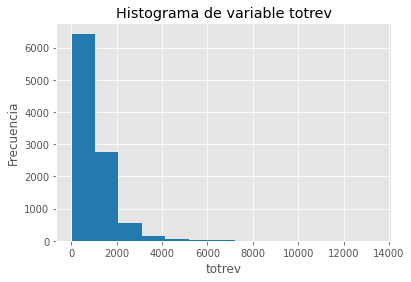

In [167]:
plt.style.use('ggplot')
plt.hist(df3["totrev"],bins=13,color="#237AAF")
plt.title('Histograma de variable totrev')
plt.xlabel("totrev");plt.ylabel("Frecuencia")
plt.show()

In [168]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


#### Boxplot

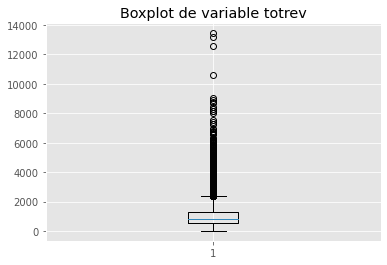

In [169]:
plt.style.use('ggplot')
plt.boxplot(df3["totrev"])
plt.title('Boxplot de variable totrev')
plt.show()

#### Gráficas a partir de `groupby`

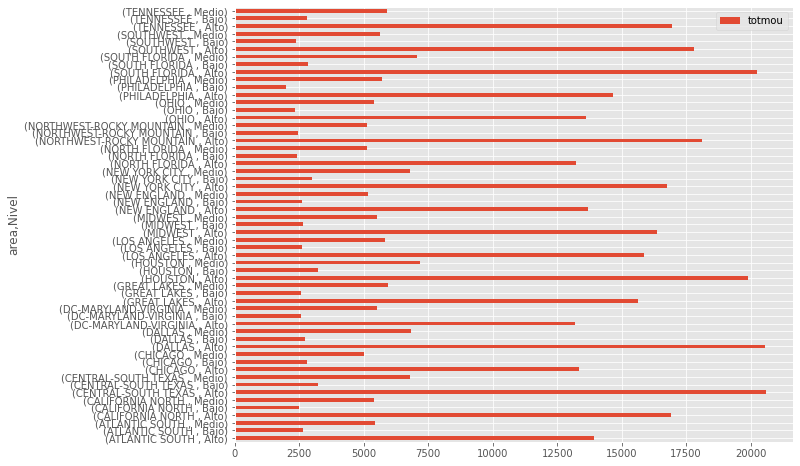

In [171]:
df4=df_con_etiquetas.groupby(['area','Nivel'])[['totmou']].mean()
df4.plot(kind='barh',figsize=(10,8))
plt.show()

#### Gráficas de `pandas`  

El modulo`.plot()` genera por defecto una gráfica de línea, existen varios gráficos para los `DataFrameGroup`

    - 'line' : Gráfica de línea
    - 'bar' :  Diagrama de barras vertical
    - 'barh' : Diagrama de barras horizontal
    - 'hist' : histograma
    - 'box' : boxplot
    - 'kde' : Kernel de densidad
    - 'area' : Gráfica de área
    - 'pie' : Diagrama de torta
    - 'scatter' : Diagrama de dispersión
    - 'hexbin' : Diagrama de hexágonos

In [172]:
df3.columns

Index(['Customer_ID', 'totmou', 'totrev', 'creditcd_x', 'eqpdays',
       'custcare_Mean', 'new_cell', 'area', 'creditcd_y'],
      dtype='object')

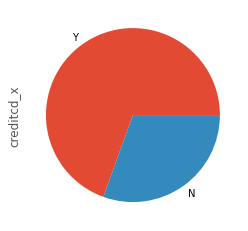

In [173]:
df3["creditcd_x"].value_counts().plot(kind="pie")
plt.show()

Revisando la relación entre las dos variables `totrev` y `totmou`

<AxesSubplot:xlabel='totrev', ylabel='totmou'>

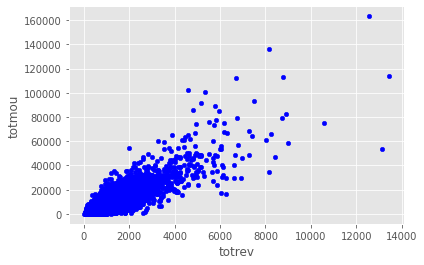

In [174]:
df3.plot(kind="scatter",x='totrev',y='totmou',c='blue')

### `Seaborn`

/home/isaac/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/isaac/miniconda3/lib/python3.9/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


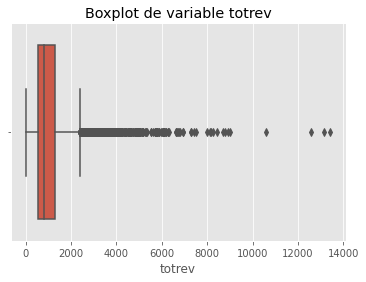

In [175]:
import seaborn as sns
sns.boxplot(df3["totrev"],orient='v')
plt.title('Boxplot de variable totrev')
plt.show()

### Gráficas de parcela 

In [176]:
df3

,Customer_ID,totmou,totrev,creditcd_x,eqpdays,custcare_Mean,new_cell,area,creditcd_y
0,1082423,7269.0,906.58,Y,371,14.333333,U,NEW ENGLAND,Y
1,1069232,13552.0,1172.25,N,83,3.666667,U,ATLANTIC SOUTH,N
2,1031705,4152.0,577.39,Y,675,3.000000,U,NEW YORK CITY,Y
3,1089806,1863.0,294.26,Y,218,11.000000,U,CHICAGO,Y
4,1076695,4155.0,433.16,N,222,0.000000,U,NORTH FLORIDA,N
...,...,...,...,...,...,...,...,...,...
9992,1027614,2570.0,484.31,Y,611,0.666667,U,CHICAGO,Y
9993,1098422,2105.0,583.36,Y,1243,0.000000,U,SOUTHWEST,Y
9994,1096497,3690.0,294.29,Y,212,0.666667,Y,NEW ENGLAND,Y
9995,1087248,3333.0,233.08,Y,290,0.000000,U,CALIFORNIA NORTH,Y


<Figure size 8352x288 with 0 Axes>

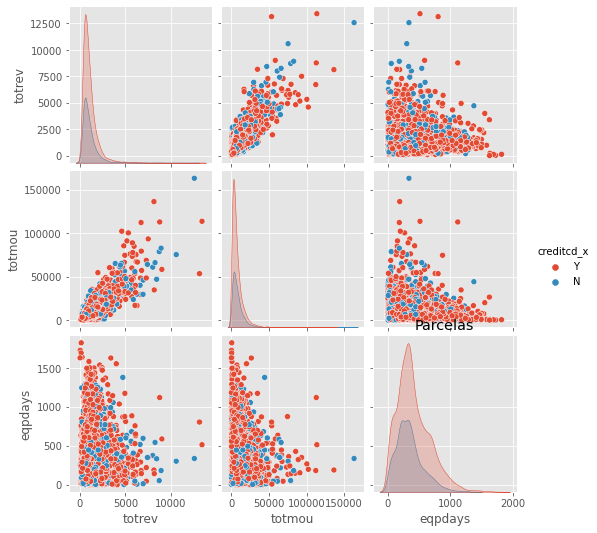

In [177]:
plt.figure(figsize=(116,4))
sns.pairplot(data=df3, hue='creditcd_x', vars=['totrev','totmou','eqpdays'])
plt.title("Parcelas")
plt.show()

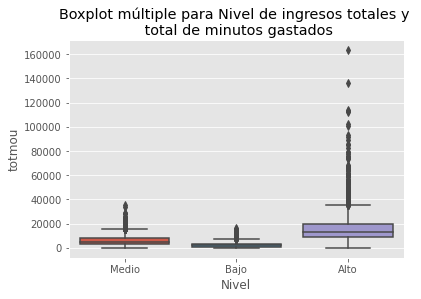

In [180]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Nivel',y='totmou',data=df_con_etiquetas)
plt.title('Boxplot múltiple para Nivel de ingresos totales y \n total de minutos gastados')
plt.show()

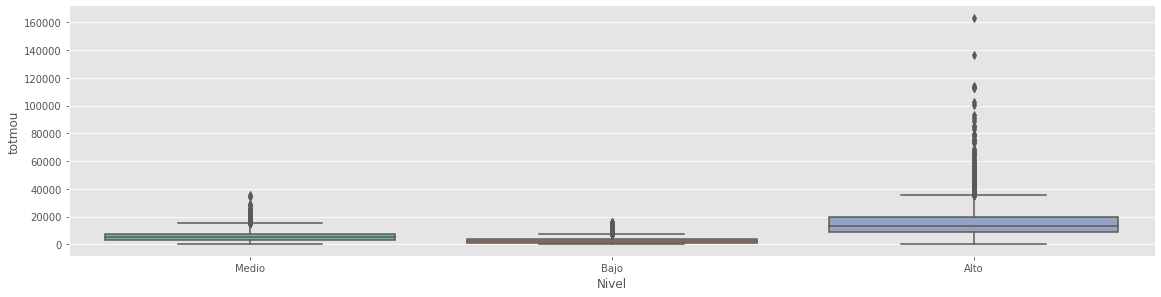

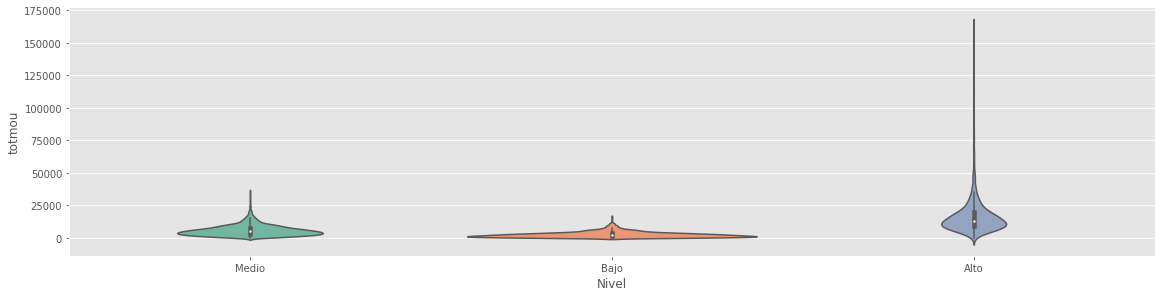

In [181]:
sns.catplot(y="totmou", x="Nivel", kind="box",    data=df_con_etiquetas, height=4, aspect=4, palette='Set2')
sns.catplot(y="totmou", x="Nivel", kind="violin", data=df_con_etiquetas, height=4, aspect=4, palette='Set2')

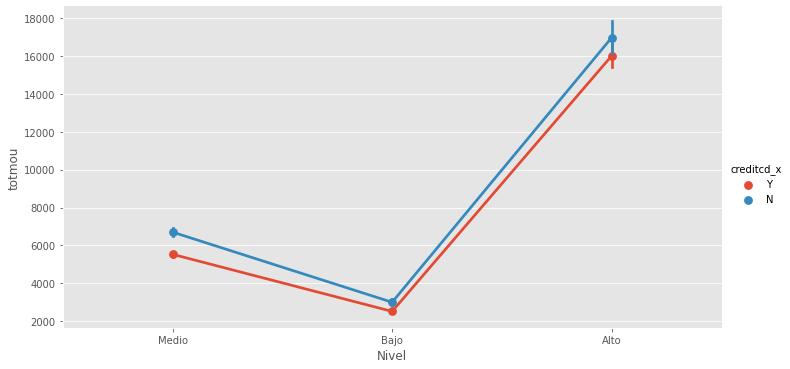

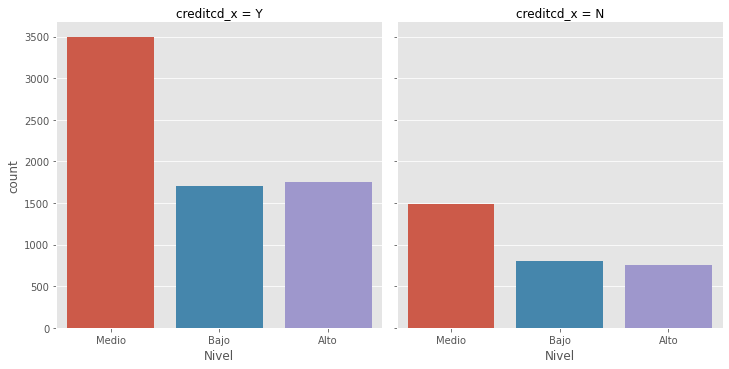

In [182]:
ax = sns.catplot(y="totmou", x="Nivel", hue='creditcd_x', kind='point',data=df_con_etiquetas, aspect=2)
ax = sns.catplot(x="Nivel", kind='count',data=df_con_etiquetas, col='creditcd_x')

### Ejercicio 5

Realice un  boxplot para la variable totmou segmentado por las variable  credict_x y Nivel_totrev

In [ ]:
# realice el ejercicio en este espacio

## Resumen


1. Leer datos desde archivos.
2. Agregar y manipular datos .
3. Analizar estadísticas de resumen y reunir información.
4. Usar matplotlib para crear gráficos para hacer análisis visual, además de otras librerías.

Para más información

> [https://pandas.pydata.org/pandas-docs/stable/getting_started/index.html](https://pandas.pydata.org/pandas-docs/stable/getting_started/index.html)